# 전처리 과정

In [26]:
import matplotlib.pyplot as plt
import numpy as np
import os

from torchvision import transforms

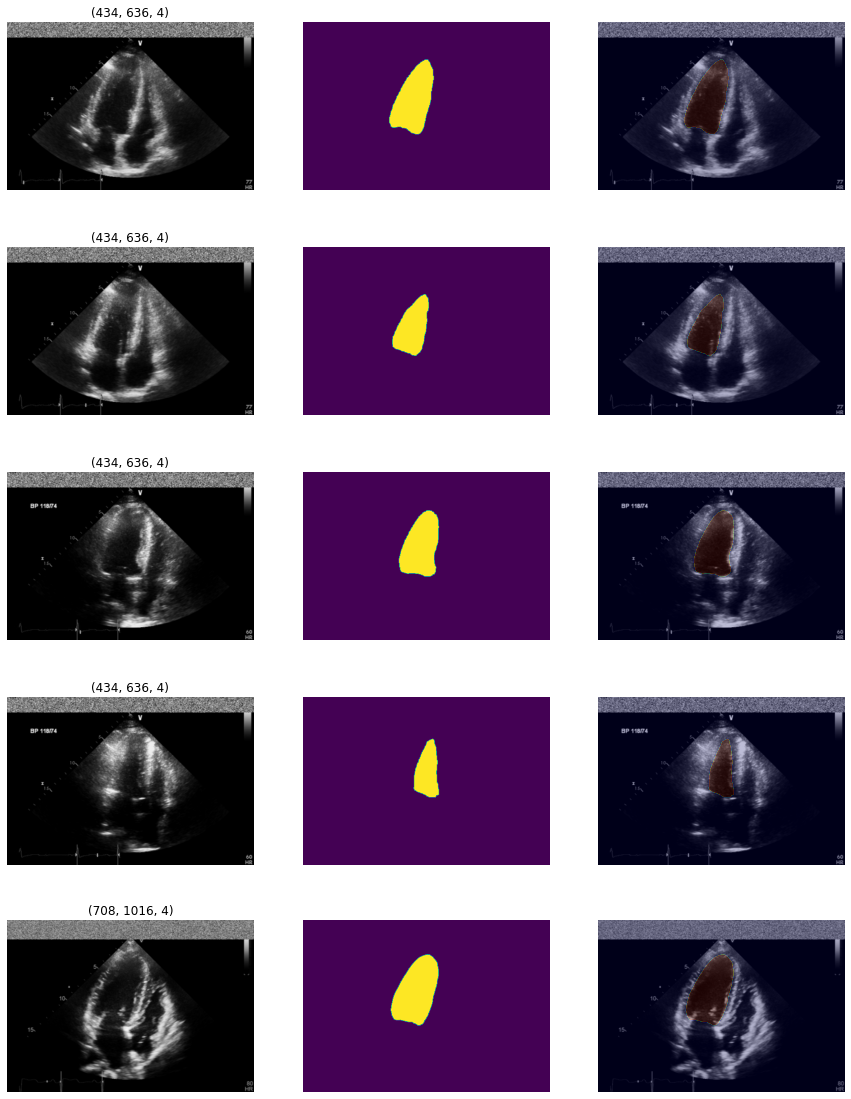

In [114]:
# subplots
fig, ax = plt.subplots(5, 3, figsize=(15, 20))
ax = ax.ravel()
for i in range(5):
    img = plt.imread('data/original/train/A4C/{:04d}.png'.format(i+1))
    ax[3*i].imshow(img)
    ax[3*i].axis('off')
    ax[3*i].set_title(img.shape)
    mask = np.load('data/original/train/A4C/{:04d}.npy'.format(i+1))
    ax[3*i+1].imshow(mask)
    ax[3*i+1].axis('off')
    ax[3*i+2].imshow(img)
    ax[3*i+2].imshow(mask, alpha=0.2, cmap='jet')
    ax[3*i+2].axis('off')

In [28]:
def remove_topnoise(img, mask):
    cand1 = int(img.shape[1] / 8 * 7)
    cand2 = int(img.shape[1] / 8 * 6)

    cutoff1 = np.where(img[:, cand1, :] < 0.01)[0][0]
    cutoff2 = np.where(img[:, cand2, :] < 0.01)[0][0]


    cutoff_min = np.min([cutoff1, cutoff2])

    return img[cutoff_min:, ], mask[cutoff_min:, ] 


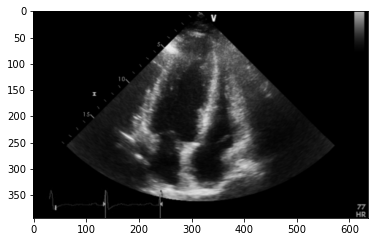

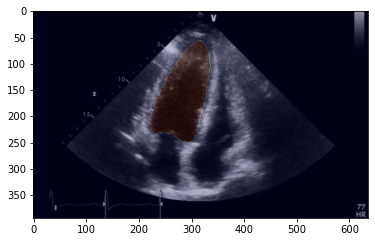

In [50]:
# 상단 노이즈 제거
img = plt.imread('data/original/train/A4C/0001.png')
mask = np.load('data/original/train/A4C/0001.npy')
img, mask = remove_topnoise(img, mask)
plt.imshow(img)
plt.show()
plt.imshow(img)
plt.imshow(mask, alpha=0.2,cmap='jet')

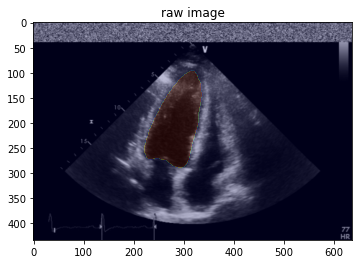

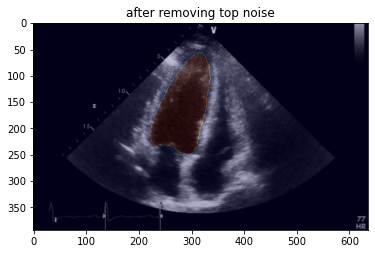

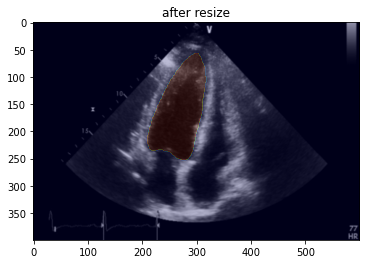

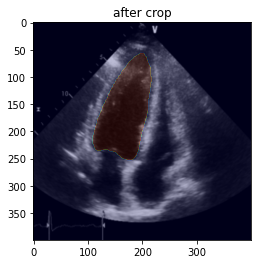

In [ ]:
resize = transforms.Compose([transforms.ToTensor(), transforms.Resize((400, 600))])

img = plt.imread('data/original/train/A4C/0001.png')
mask = np.load('data/original/train/A4C/0001.npy')
plt.imshow(img)
plt.title('raw image')
plt.imshow(mask, alpha=0.2,cmap='jet')
plt.show()

img, mask = remove_topnoise(img, mask)
plt.imshow(img)
plt.imshow(mask, alpha=0.2,cmap='jet')
plt.title('after removing top noise')
plt.show()

img_resize = resize(img)
mask_resize = resize(mask)
plt.imshow(img_resize.numpy().transpose(1,2,0))
plt.imshow(mask_resize.numpy().transpose(1,2,0), alpha=0.2,cmap='jet')
plt.title('after resize')
plt.show()

plt.imshow(img_resize.numpy().transpose(1,2,0)[:, 100:-100, :])
plt.imshow(mask_resize.numpy().transpose(1,2,0)[:, 100:-100, :], alpha=0.2,cmap='jet')
plt.title('after crop')
plt.show()

In [7]:
os.makedirs('data/remove_topnoise/train/A2C', exist_ok=True)
os.makedirs('data/remove_topnoise/validation/A2C', exist_ok=True)
os.makedirs('data/remove_topnoise/train/A4C', exist_ok=True)
os.makedirs('data/remove_topnoise/validation/A4C', exist_ok=True)

In [58]:
def resize_crop(img, mask, resize_h=400, resize_w=600, crop_size=100):
    resize = transforms.Compose([transforms.ToTensor(), transforms.Resize((resize_h, resize_w))])

    img = resize(img)
    mask = resize(mask)

    img = img[:, :, crop_size:-crop_size]
    mask = mask[:, :, crop_size:-crop_size]

    return img, mask

In [103]:
for mode in ['train', 'validation']:
    for version in ['A2C', 'A4C']:
        os.makedirs(f'data/resize_crop/{mode}/{version}', exist_ok=True)
        print(f'{mode} {version}')
        img_list = sorted(os.listdir(f'data/original/{mode}/{version}'))
        for img_name in img_list:
            print(img_name)
            if img_name.endswith('.png'):
                img = plt.imread(f'data/original/{mode}/{version}/' + img_name)
                mask = np.load(f'data/original/{mode}/{version}/' + img_name.replace('png', 'npy'))
                img, mask = remove_topnoise(img, mask)
                img, mask = resize_crop(img, mask)

                img = img.numpy()
                img = img.transpose(1, 2, 0)

                mask = mask.numpy()
                mask = mask.transpose(1, 2, 0)
                
                plt.imsave(f'data/resize_crop/{mode}/{version}/' + img_name, img[:,:,:3])
                np.save(f'data/resize_crop/{mode}/{version}/' + img_name.replace('png', 'npy'), mask)

train A2C
0001.npy
0001.png
0002.npy
0002.png
0003.npy
0003.png
0004.npy
0004.png
0005.npy
0005.png
0006.npy
0006.png
0007.npy
0007.png
0008.npy
0008.png
0009.npy
0009.png
0010.npy
0010.png
0011.npy
0011.png
0012.npy
0012.png
0013.npy
0013.png
0014.npy
0014.png
0015.npy
0015.png
0016.npy
0016.png
0017.npy
0017.png
0018.npy
0018.png
0019.npy
0019.png
0020.npy
0020.png
0021.npy
0021.png
0022.npy
0022.png
0023.npy
0023.png
0024.npy
0024.png
0025.npy
0025.png
0026.npy
0026.png
0027.npy
0027.png
0028.npy
0028.png
0029.npy
0029.png
0030.npy
0030.png
0031.npy
0031.png
0032.npy
0032.png
0033.npy
0033.png
0034.npy
0034.png
0035.npy
0035.png
0036.npy
0036.png
0037.npy
0037.png
0038.npy
0038.png
0039.npy
0039.png
0040.npy
0040.png
0041.npy
0041.png
0042.npy
0042.png
0043.npy
0043.png
0044.npy
0044.png
0045.npy
0045.png
0046.npy
0046.png
0047.npy
0047.png
0048.npy
0048.png
0049.npy
0049.png
0050.npy
0050.png
0051.npy
0051.png
0052.npy
0052.png
0053.npy
0053.png
0054.npy
0054.png
0055.npy
0055.png


# A4C 데이터 분포

In [42]:
size_list = []
for i in range(800):
    img = plt.imread('data/remove_topnoise/train/A4C/{:04d}.png'.format(i+1))
    size_list.append(str(img.shape[:2]))

In [43]:
np.unique(size_list, return_counts=True)

(array(['(381, 636)', '(393, 636)', '(394, 636)', '(439, 640)',
        '(539, 800)', '(627, 1016)', '(639, 960)', '(686, 1024)'],
       dtype='<U11'),
 array([ 11, 548,   2,   4, 174,  45,   9,   7]))

In [ ]:
400 600 -> 400 400

In [44]:
393/636, 539/800

(0.6179245283018868, 0.67375)

(array([565.,   0.,   0.,   0., 174.,   0.,   0.,   0.,   9.,  52.]),
 array([ 636. ,  674.8,  713.6,  752.4,  791.2,  830. ,  868.8,  907.6,
         946.4,  985.2, 1024. ]),
 <BarContainer object of 10 artists>)

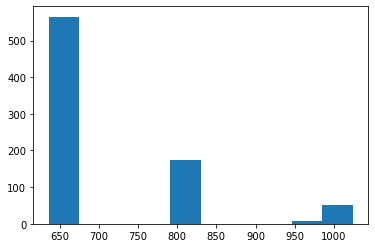

In [20]:
# 해상도 (가로)
plt.hist(np.array(size_list)[:,1])

(array([561.,   4.,   0.,   0.,   0., 174.,   0.,   0.,  54.,   7.]),
 array([422. , 456.6, 491.2, 525.8, 560.4, 595. , 629.6, 664.2, 698.8,
        733.4, 768. ]),
 <BarContainer object of 10 artists>)

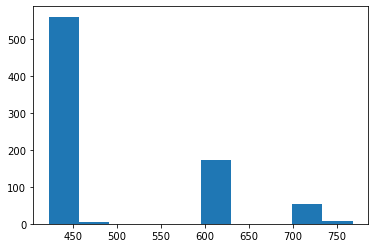

In [21]:
# 해상도 (세로)
plt.hist(np.array(size_list)[:,0])

(array([ 11.,   0., 550.,  45.,   0.,   0.,   0.,   0.,   0., 194.]),
 array([0.66352201, 0.67216981, 0.68081761, 0.68946541, 0.69811321,
        0.70676101, 0.71540881, 0.7240566 , 0.7327044 , 0.7413522 ,
        0.75      ]),
 <BarContainer object of 10 artists>)

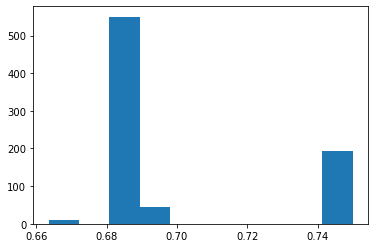

In [22]:
# 가로 대비 세로 비율
plt.hist(np.array(size_list)[:,0] / np.array(size_list)[:,1])

(array([ 63., 164., 200., 177., 111.,  46.,  20.,  11.,   2.,   6.]),
 array([0.01637176, 0.02599846, 0.03562516, 0.04525186, 0.05487856,
        0.06450526, 0.07413196, 0.08375866, 0.09338536, 0.10301206,
        0.11263876]),
 <BarContainer object of 10 artists>)

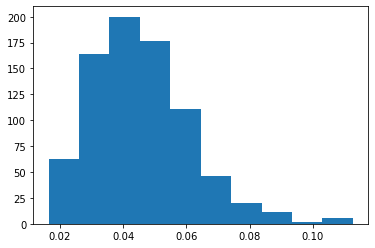

In [23]:
# 전체 대비 마스크 크기 비율
mask_list = []
for i in range(800):
    img = np.load('data/train/A4C/{:04d}.npy'.format(i+1))
    mask_list.append(img.sum() / img.size)
plt.hist(mask_list)

In [84]:
# 전체 대비 마스크 크기 비율
mask_list = []
for i in range(800):
    img = np.load('data/train/A4C/{:04d}.npy'.format(i+1))
    mask_list.append(img)

In [85]:
sum_mask = np.sum(mask_list)
sum_mask.shape

/home/kang/anaconda3/envs/torch/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


ValueError: operands could not be broadcast together with shapes (434,636) (708,1016) 

# A2C 데이터 분포

In [91]:
size_list = []
for i in range(800):
    img = plt.imread('data/train/A2C/{:04d}.png'.format(i+1))
    size_list.append(str(img.shape[:2]))

In [92]:
np.unique(np.array(size_list), return_counts=True)

(array(['(422, 636)', '(434, 636)', '(480, 640)', '(600, 800)',
        '(708, 1016)', '(720, 960)', '(768, 1024)'], dtype='<U11'),
 array([  9, 558,   2, 177,  39,   6,   9]))

(array([569.,   0.,   0.,   0., 177.,   0.,   0.,   0.,   6.,  48.]),
 array([ 636. ,  674.8,  713.6,  752.4,  791.2,  830. ,  868.8,  907.6,
         946.4,  985.2, 1024. ]),
 <BarContainer object of 10 artists>)

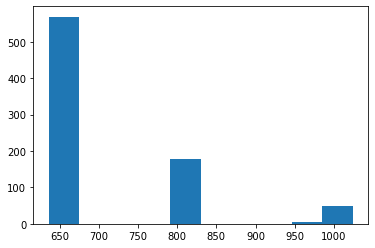

In [25]:
# 해상도 (가로)
plt.hist(np.array(size_list)[:,1])

(array([567.,   2.,   0.,   0.,   0., 177.,   0.,   0.,  45.,   9.]),
 array([422. , 456.6, 491.2, 525.8, 560.4, 595. , 629.6, 664.2, 698.8,
        733.4, 768. ]),
 <BarContainer object of 10 artists>)

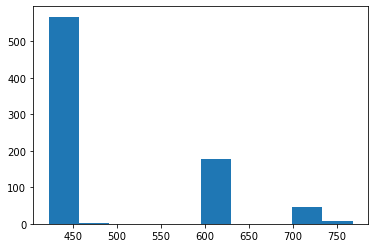

In [26]:
# 해상도 (세로)
plt.hist(np.array(size_list)[:,0])

(array([  9.,   0., 558.,  39.,   0.,   0.,   0.,   0.,   0., 194.]),
 array([0.66352201, 0.67216981, 0.68081761, 0.68946541, 0.69811321,
        0.70676101, 0.71540881, 0.7240566 , 0.7327044 , 0.7413522 ,
        0.75      ]),
 <BarContainer object of 10 artists>)

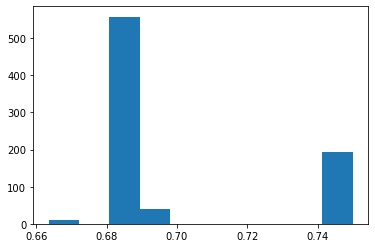

In [27]:
# 가로 대비 세로 비율
plt.hist(np.array(size_list)[:,0] / np.array(size_list)[:,1])

(array([ 22., 182., 270., 170.,  94.,  36.,  16.,   6.,   1.,   3.]),
 array([0.01247355, 0.02339579, 0.03431803, 0.04524027, 0.05616251,
        0.06708475, 0.07800698, 0.08892922, 0.09985146, 0.1107737 ,
        0.12169594]),
 <BarContainer object of 10 artists>)

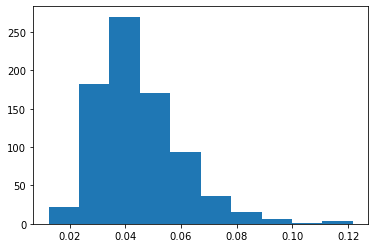

In [28]:
# 전체 대비 마스크 크기 비율
mask_list = []
for i in range(800):
    img = np.load('data/train/A2C/{:04d}.npy'.format(i+1))
    mask_list.append(img.sum() / img.size)
plt.hist(mask_list)

In [48]:
i = 100
img = plt.imread('data/train/A2C/{:04d}.png'.format(i+1))


In [51]:
# 이미지의 채널 수: 4
print('이미지 shape:',img.shape)
# 마지막 채널은 전부 1
print('4번째 채널의 값 분포:', np.unique(img[:,:,3], return_counts=True))

이미지 shape: (434, 636, 4)
4번째 채널의 값 분포: (array([1.], dtype=float32), array([276024]))


In [62]:
# 흑백 이미지
np.sum(img[:,:,0] != img[:,:,1]), np.sum(img[:,:,1] != img[:,:,2])

(0, 0)

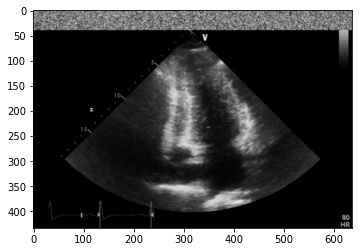

In [30]:
plt.imshow(img)

In [ ]:
# 전처리를 어떻게 할지
a